# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline

In [31]:
retail = pd.read_csv('../datasets/example_retail_sales.csv')


In [32]:
retail['ds'] = pd.to_datetime(retail['ds'])
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
ds    293 non-null datetime64[ns]
y     293 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.7 KB


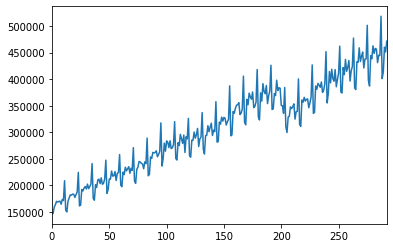

In [33]:
retail['y'].plot()

In [34]:
retail['y']=np.log(retail['y'])

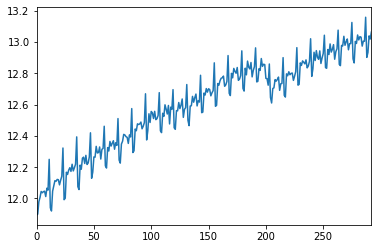

In [35]:
retail['y'].plot()

In [36]:
retail

,ds,y
0,1992-01-01,11.893934
1,1992-02-01,11.898725
2,1992-03-01,11.978770
3,1992-04-01,12.005601
4,1992-05-01,12.043954
5,1992-06-01,12.035658
6,1992-07-01,12.042906
7,1992-08-01,12.045693
8,1992-09-01,12.011377
9,1992-10-01,12.064826


In [12]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


m = Prophet()
m.fit(retail)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = m.make_future_dataframe(periods=2, freq='M')
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
5,1992-06-01
6,1992-07-01
7,1992-08-01
8,1992-09-01
9,1992-10-01


In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,11.989474,11.853644,11.894761,11.989474,11.989474,-0.114724,-0.114724,-0.114724,-0.114724,-0.114724,-0.114724,0.0,0.0,0.0,11.874750
1,1992-02-01,11.995879,11.871942,11.910471,11.995879,11.995879,-0.104965,-0.104965,-0.104965,-0.104965,-0.104965,-0.104965,0.0,0.0,0.0,11.890914
2,1992-03-01,12.001871,11.991437,12.031093,12.001871,12.001871,0.009136,0.009136,0.009136,0.009136,0.009136,0.009136,0.0,0.0,0.0,12.011007
3,1992-04-01,12.008276,11.978454,12.019644,12.008276,12.008276,-0.009011,-0.009011,-0.009011,-0.009011,-0.009011,-0.009011,0.0,0.0,0.0,11.999265
4,1992-05-01,12.014475,12.035233,12.074734,12.014475,12.014475,0.040471,0.040471,0.040471,0.040471,0.040471,0.040471,0.0,0.0,0.0,12.054946
5,1992-06-01,12.020881,12.013132,12.053328,12.020881,12.020881,0.012457,0.012457,0.012457,0.012457,0.012457,0.012457,0.0,0.0,0.0,12.033337
6,1992-07-01,12.027079,12.017344,12.057909,12.027079,12.027079,0.010502,0.010502,0.010502,0.010502,0.010502,0.010502,0.0,0.0,0.0,12.037582
7,1992-08-01,12.033485,12.041870,12.081223,12.033485,12.033485,0.028076,0.028076,0.028076,0.028076,0.028076,0.028076,0.0,0.0,0.0,12.061561
8,1992-09-01,12.039890,11.978804,12.017725,12.039890,12.039890,-0.041919,-0.041919,-0.041919,-0.041919,-0.041919,-0.041919,0.0,0.0,0.0,11.997971
9,1992-10-01,12.046089,12.020515,12.060180,12.046089,12.046089,-0.005777,-0.005777,-0.005777,-0.005777,-0.005777,-0.005777,0.0,0.0,0.0,12.040312


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
360,2021-12-31,13.119423,12.787610,13.521058
361,2022-01-31,13.151778,12.813538,13.568664
362,2022-02-28,13.239790,12.894746,13.662158
363,2022-03-31,13.230343,12.879331,13.665641
364,2022-04-30,13.282491,12.918586,13.726784


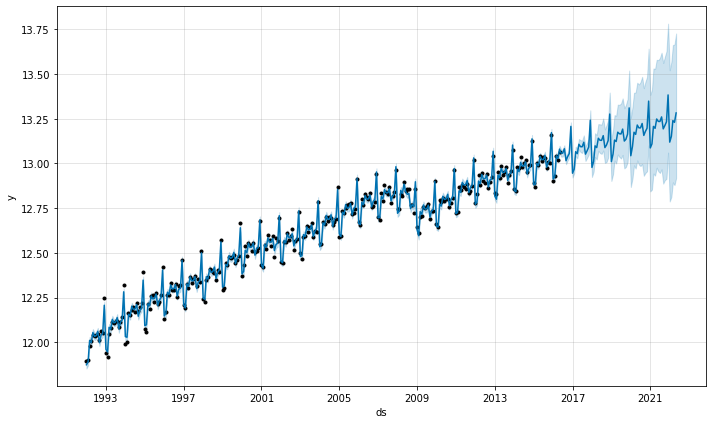

In [15]:
fig1 = m.plot(forecast)

In [179]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

In [199]:
X = pd.DataFrame(retail['y'])
Y = pd.DataFrame(retail['ds'])
size = int(len(X) * 0.9)
train_X, test_X = X[0:size], X[size:len(X)]
train_Y, test_Y = Y[0:size], Y[size:len(Y)]
    
Base_Train=pd.concat([train_Y,train_X], axis=1)
Base_Test=pd.concat([test_Y,test_X], axis=1)
    
predictions = list()
    
def ROLLING_PROPHET():   
    history = Base_Train.copy()
    
    for t in range(len(test_X)):
        m = Prophet()
        m.fit(history);
        future = m.make_future_dataframe(periods=1, freq='M')
        forecast = m.predict(future)
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        yhat = output[['yhat']][len(history):].values[0][0]
        predictions.append(yhat)
        obs = pd.DataFrame(Base_Test[['ds','y']].iloc[t])
        history = pd.concat([history, obs.transpose()],axis=0)
        print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))

    
    error = mean_squared_error(test_X, predictions)**0.5
    print('Test RMSE: %.3f' % error)
    

In [200]:
ROLLING_PROPHET()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.127264, expected=13.075701


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.859873, expected=12.856832


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.893452, expected=12.848755


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.975426, expected=12.978045


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.967810, expected=12.974826


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.018750, expected=13.036418


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.025080, expected=12.978844


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.011252, expected=13.001336


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.042763, expected=13.019030


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.969681, expected=12.950082


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.978530, expected=12.989294


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.008261, expected=12.989769


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.159190, expected=13.124824


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.890090, expected=12.892326


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.933495, expected=12.866012


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.007518, expected=13.003828


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.999677, expected=12.990470


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.049601, expected=13.044650


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.049784, expected=13.013060


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.039224, expected=13.033991


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.071909, expected=13.030993


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.997205, expected=12.973671


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.001747, expected=13.005737


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.032747, expected=13.004721


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.178769, expected=13.158219


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.910965, expected=12.901537


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=12.959121, expected=12.932543


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.036898, expected=13.039184


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=13.023459, expected=13.019078
predicted=13.073317, expected=13.063507
Test RMSE: 0.026


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
Base_Log=pd.DataFrame({'Test':Base_Test['y'],'Prediction':predictions})
Base=pd.DataFrame({'Test':np.exp(Base_Test['y']),'Prediction':np.exp(predictions)})

# Forecast Serie Logaritmo

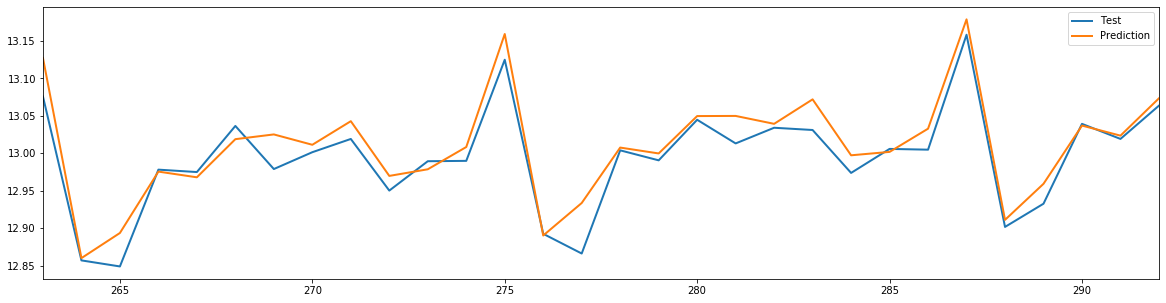

In [213]:
Base_Log.plot(figsize=(20,5), linewidth=2, fontsize=10)

# Forecast Serie en nivel

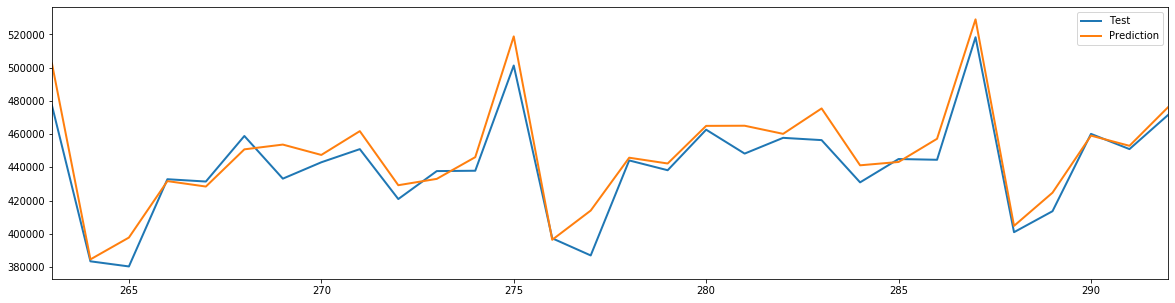

In [214]:
Base.plot(figsize=(20,5), linewidth=2, fontsize=10)